# 1 Parte - Teste de Normalidade

# 1.1 Método gráfico é uma técnica utilizada para verificar a adequação de um determinado modelo estatístico aos dados. A técnica que iremos descrever é simples de utilizar e pode ser aplicada a inúmeros tipos de modelos estatísticos.

## Fonte referência : [Portal Action.](http://www.portalaction.com.br/inferencia/testes-de-normalidade)

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

Vou gerar dados que são normalmente distribuidos.

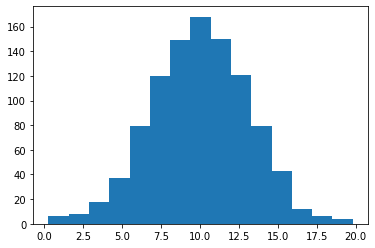

In [2]:
## Para reprodutibilidade
np.random.seed(7654321)

## Gerar amostra normal N(10, 9) de tamanho nsample
nsample = 1000

## Plot do histograma
x = stats.norm.rvs(loc=10, scale=3, size=nsample)
plt.hist(x,bins=15);

## Fonte de referência para usar fazer o QQ-PLOT
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

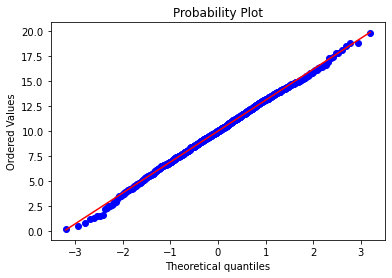

In [3]:
## Gráfico qq-plot
res = stats.probplot(x, plot=plt)
plt.show() 

Combinando os dois gráficos em apenas um.

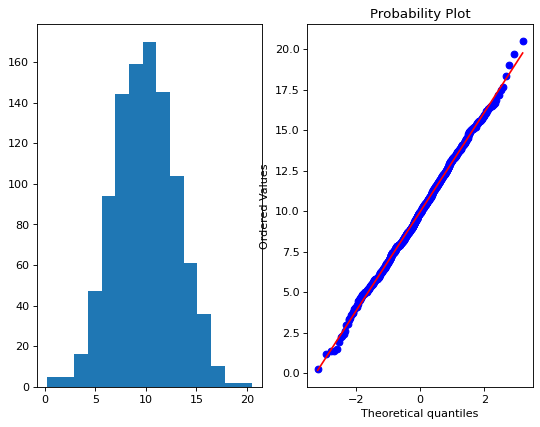

In [4]:
## Define o tamanho do gráfico
figure(figsize=(8, 6), dpi=80)

## Gera os dados
x = stats.norm.rvs(loc=10, scale=3, size=nsample)

## Plot histograma
ax1 = plt.subplot(121)
plt.hist(x,bins=15);

## Plot qq-plot
ax2 = plt.subplot(122)
res = stats.probplot(x, plot=plt)

Vou gerar dados que **NÂO** são normalmente distribuidos.

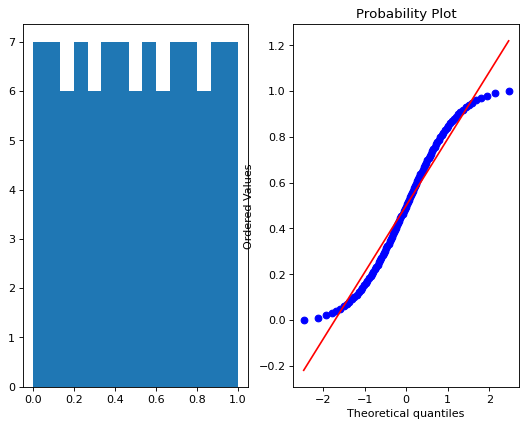

In [6]:
## Define o tamanho do gráfico
figure(figsize=(8, 6), dpi=80)

## Gera os dados NÂO normais
# x = stats.norm.rvs(loc=10, scale=3, size=nsample)**2
x = np.linspace(0, 1, 100)


## Plot histograma
ax1 = plt.subplot(121)
plt.hist(x,bins=15);

## Plot qq-plot
ax2 = plt.subplot(122)
res = stats.probplot(x, plot=plt)

In [7]:
print("Voltar para o slide 13 da aula.")

Voltar para o slide 13 da aula.


## 1.2 Teste de Normalidade de KOLMOGOROV-SMIRNOV

Grande parte dos problemas que encontramos em estatística são tratados com a hipótese que os dados são retirados de uma população com uma distribuição de probabilidade específica. O formato desta distribuição pode ser um dos objetivos da análise. Em alguns casos, assumir a normalidade dos dados é o primeiro passo que tomamos para simplificar nossas análise. Para dar suporte a esta suposição, consideramos, dentre outros, o teste de Kolmogorov - Smirnov. 
Fonte: [Portal Action](http://www.portalaction.com.br/inferencia/62-teste-de-kolmogorov-smirnov)

Vou gerar números que obviamente **NÃO** seguem uma distribuição normal.

KstestResult(statistic=0.5, pvalue=1.2131434371817858e-23)


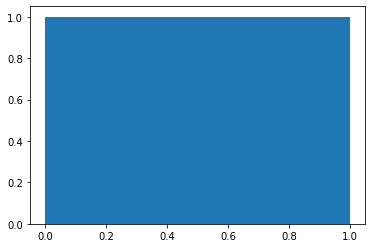

In [8]:
#from scipy import stats

## Gera dados nã normalmente distribuidos com tamanho amostral igual a 100
x = np.linspace(0, 1, 100)

## Plota histograma
plt.hist(x, bins=100)

## Calcula estatística do KS
print(stats.kstest(x, 'norm'))

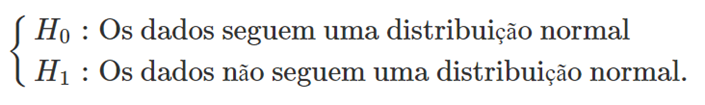



### Como o P-value é muito pequeno, eu **REJEITO HO**, logo os dados não são normalmente distribuidos pelo teste de KS. (Ou melhor, não posso afirmar que os dados são normalmente distribuidos).

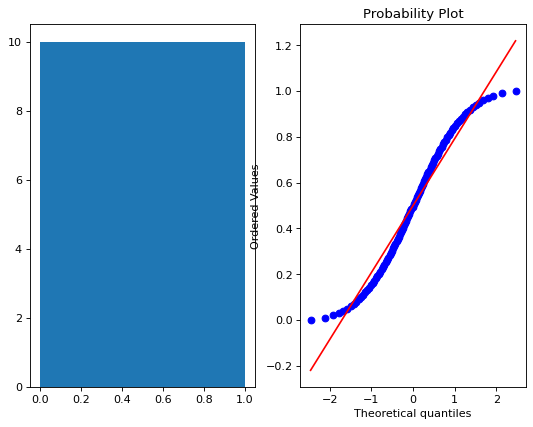

In [9]:
figure(figsize=(8, 6), dpi=80)
x = np.linspace(0, 1, 100)

## Histograma
ax1 = plt.subplot(121)
plt.hist(x);

## QQ-plot
ax2 = plt.subplot(122)
res = stats.probplot(x, plot=plt)

Vou gerar uma distribuição que é bem parecida com a normal mas não é.
Referência: https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_beta
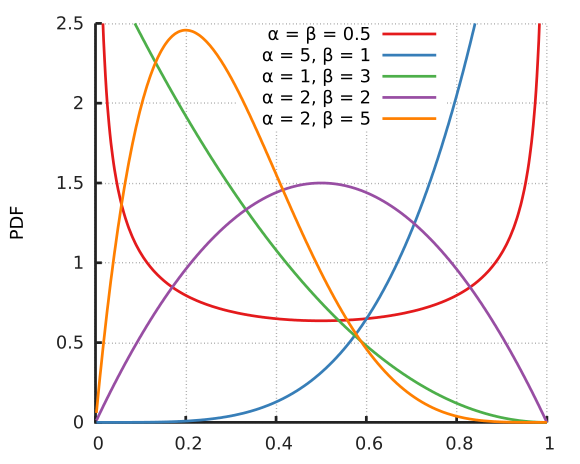

KstestResult(statistic=0.5000011925257191, pvalue=1.0616258198253015e-231)


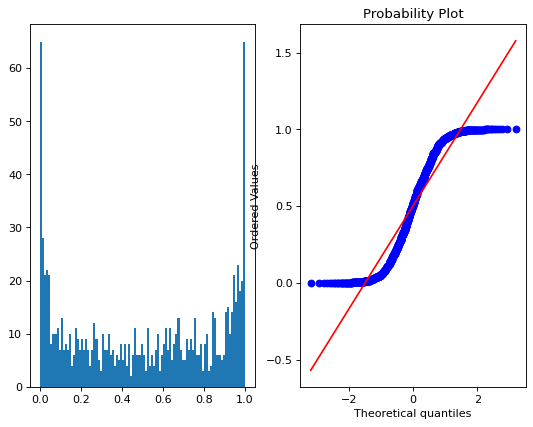

In [14]:
figure(figsize=(8, 6), dpi=80)
from scipy.stats import beta
r = beta.rvs(0.5, 0.5, size=1000)

## Histograma
ax1 = plt.subplot(121)
plt.hist(r, bins=100);

## QQ-plot
ax2 = plt.subplot(122)
res = stats.probplot(r, plot=plt)

## Calcula estatística do KS
print(stats.kstest(r, 'norm'))


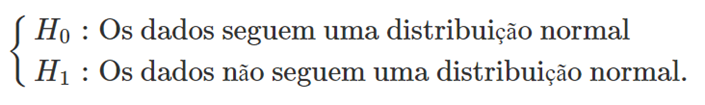



### Como o P-value é muito pequeno, eu **REJEITO HO**, logo os dados não são normalmente distribuidos pelo teste de KS. (Ou melhor, não posso afirmar que os dados são normalmente distribuidos).

Vou gerar números que seguem **SIM** uma distribuição normal.

KstestResult(statistic=0.018441700926114662, pvalue=0.8857426047411581)

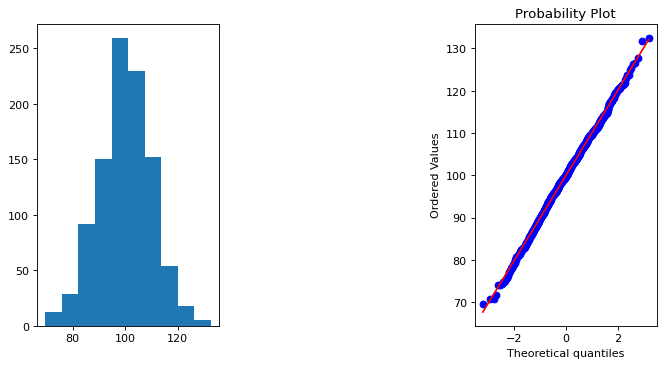

In [15]:
# Gera a amostra normal N(0,1) de tamanho nsample
nsample = 1000
x = stats.norm.rvs(loc=100, scale=10, size=nsample)

## Define o tamanho do gráfico
figure(figsize=(10, 5), dpi=80)

## Histograma
ax1 = plt.subplot(131)
plt.hist(x)

## Gráfico qq-plot
ax2 = plt.subplot(133)
res = stats.probplot(x, plot=plt)

## Printa a Estatística do teste KS
stats.kstest(stats.norm.rvs(size=nsample), "norm")

Como o P-value é muito grande, *P-valor* $> 0.05$, eu **NÂO REJEITO HO**, logo não posso dizer que os dados não são normalmente distribuidos pelo teste de KS.


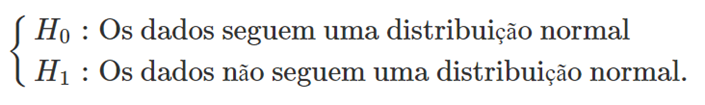



In [16]:
print("Voltar para o slide 17 da aula.")

Voltar para o slide 17 da aula.


# 2 Parte Introdução a Inferência Estatística
## Jogo de uma Moeda: Cara (1) ou Coroa (0)
### Qual é a probabilidade de sair Cara???

In [17]:
moeda = [0,1]
print("Temos uma moeda com duas faces:",moeda)

Temos uma moeda com duas faces: [0, 1]


In [18]:
import random
import numpy as np


def joga_moeda(n):
    """
    Jogue uma moeda n vezes e retorna o resultado em um array
    """
    r = []
    for _ in range(n):
        r.append(random.choice(moeda))
    return np.array(r)

In [19]:
for i in [1,5,10,50,100,500,1000,5000,10000,20000,30000,40000,50000,500000,1000000]:
    print("Média de {} jogadas de moedas: {}".format(i,round(joga_moeda(i).mean(),2)))

Média de 1 jogadas de moedas: 0.0
Média de 5 jogadas de moedas: 0.6
Média de 10 jogadas de moedas: 0.6
Média de 50 jogadas de moedas: 0.46
Média de 100 jogadas de moedas: 0.55
Média de 500 jogadas de moedas: 0.53
Média de 1000 jogadas de moedas: 0.52
Média de 5000 jogadas de moedas: 0.5
Média de 10000 jogadas de moedas: 0.5
Média de 20000 jogadas de moedas: 0.5
Média de 30000 jogadas de moedas: 0.5
Média de 40000 jogadas de moedas: 0.5
Média de 50000 jogadas de moedas: 0.5
Média de 500000 jogadas de moedas: 0.5
Média de 1000000 jogadas de moedas: 0.5


In [20]:
print("Volta para o slide 22 da aula.")

Volta para o slide 22 da aula.


## 2.1 Distribuição Amostral do Parâmetro proporção

In [21]:
npop = 50000
p = 0.8

# Gera a População Bernoulli de tamanho npop
from scipy.stats import bernoulli
x = bernoulli.rvs(p ,size=npop)
unique, counts = np.unique(x, return_counts=True)
unique
counts

df = pd.DataFrame(counts, columns=["População"], index=[["Não Imune","Imune"]])
df.head()

,População
Não Imune,10062
Imune,39938


In [24]:
x

array([1, 1, 1, ..., 0, 1, 0])

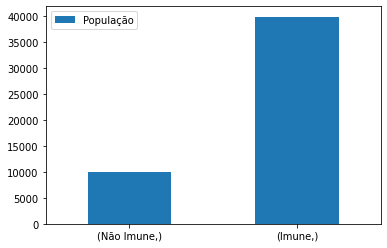

In [22]:
df.plot.bar(rot=0);

In [25]:
nsim = 999

def estima_proporcao_p(nsim, nsample):
    """
    Sorteia uma quantidade aleatória (AAS) de tamanho nsample, calcula a proporção p, retorna o resultado em um array.

    """
    r = []
    for _ in range(nsim):
        r.append(np.array(random.sample(list(x),nsample)).mean())
    return np.array(r)

In [26]:
prop_sample_5 = estima_proporcao_p(nsim, 5)
prop_sample_10 = estima_proporcao_p(nsim, 10)
prop_sample_20 = estima_proporcao_p(nsim, 20)
prop_sample_50 = estima_proporcao_p(nsim, 50)
prop_sample_100 = estima_proporcao_p(nsim, 100)
prop_sample_200 = estima_proporcao_p(nsim, 200)        

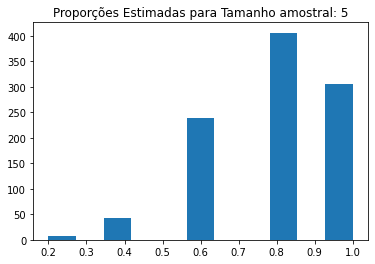

In [27]:
plt.hist(prop_sample_5, bins='auto')
plt.title("Proporções Estimadas para Tamanho amostral: 5")
plt.show()



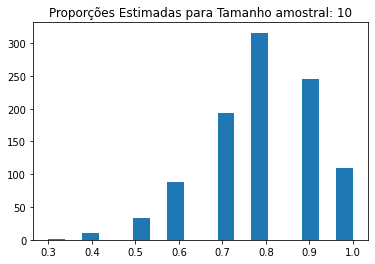

In [28]:
plt.hist(prop_sample_10, bins='auto')
plt.title("Proporções Estimadas para Tamanho amostral: 10")
plt.show()

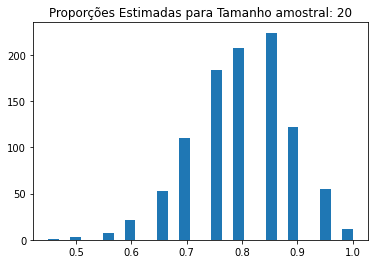

In [29]:
plt.hist(prop_sample_20, bins='auto')
plt.title("Proporções Estimadas para Tamanho amostral: 20")
plt.show()

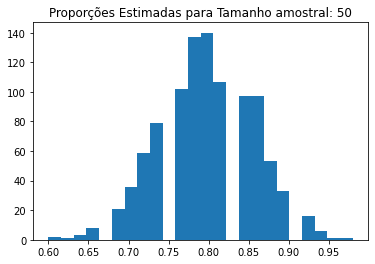

In [30]:
plt.hist(prop_sample_50, bins='auto')
plt.title("Proporções Estimadas para Tamanho amostral: 50")
plt.show()

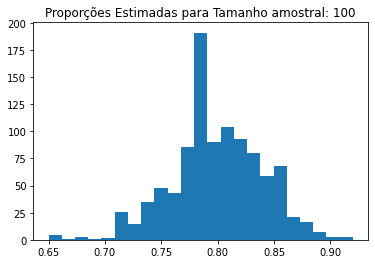

In [32]:
plt.hist(prop_sample_100, bins='auto')
plt.title("Proporções Estimadas para Tamanho amostral: 100")
plt.show()

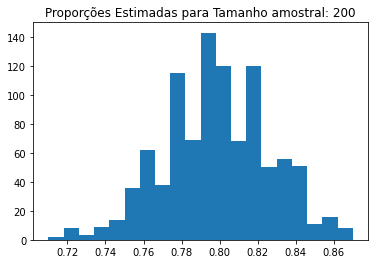

In [33]:
plt.hist(prop_sample_200, bins='auto')
plt.title("Proporções Estimadas para Tamanho amostral: 200")
plt.show()

In [34]:
print("Volta para o slide 28 da aula.")

Volta para o slide 28 da aula.


## Exemplo 1

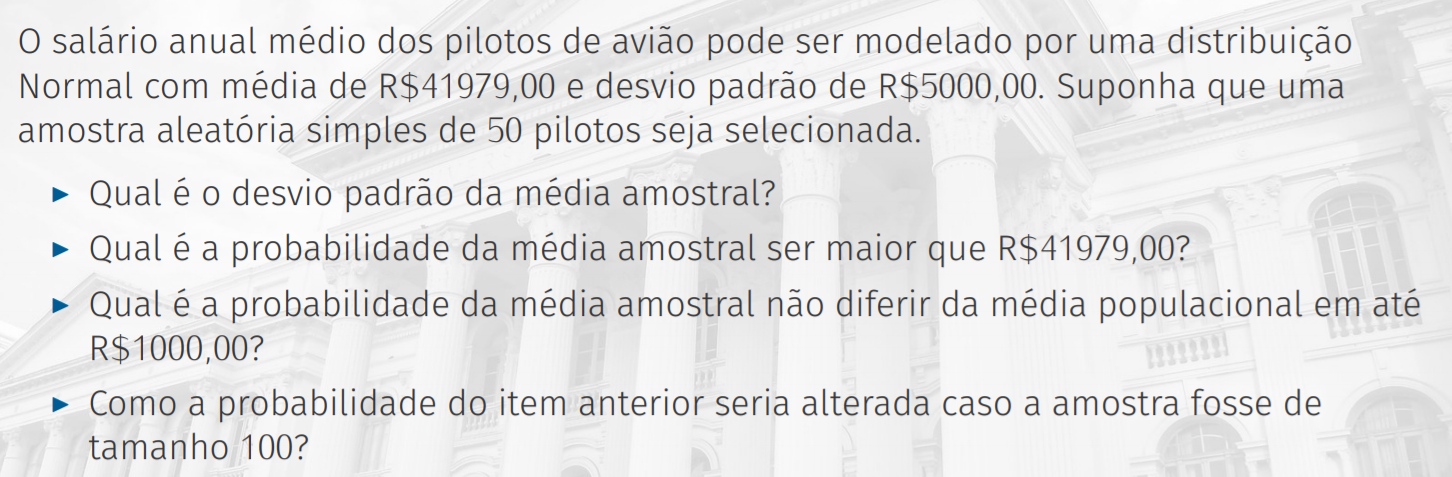

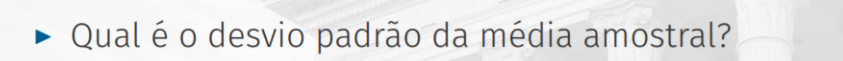

In [36]:
mu = 41979
VARIA = 5000**2/50
sigma = VARIA**0.5

print("O desvio padrão da média amostral de uma amostra de tamanho 50 é", round(sigma,2))

O desvio padrão da média amostral de uma amostra de tamanho 50 é 707.11


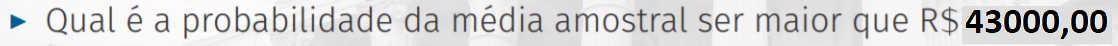

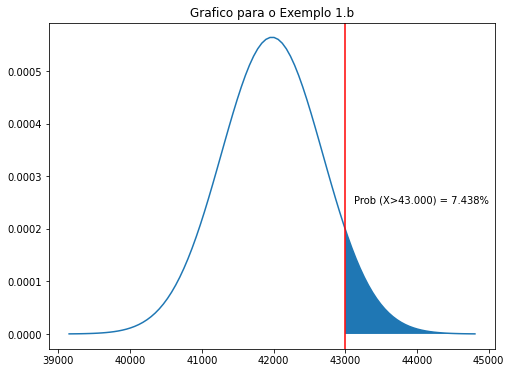

In [37]:
# - Probabilidade de X1 > 43.000
X1 = 43000

mu = 41979
VARIA = 5000**2/50
sigma = VARIA**0.5


probX1 = stats.norm.sf(X1, mu, sigma)

# pontos para desenhar a curva normal 
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# pontos para compor a area abaixo do grafico 
xa = np.linspace(X1,mu + 4*sigma, 100)
ya = stats.norm.pdf(xa, mu, sigma)

# adicionando o ponto final, para fechar o poligono a ser desenhado 
xa = np.append(xa,X1); ya = np.append(ya,0)

# gerando o grafico 
plt.figure(figsize=(8,6))

plt.title('Grafico para o Exemplo 1.b')
plt.plot(x,y)      # grafico da curva principal 
plt.fill(xa,ya)    # area sob o grafico 

texto = str('Prob (X>43.000) = ')+str(round(probX1*100,3))+str('%')
plt.text(43125, .00025,texto)

plt.axvline(x=X1, color='r', linestyle='-')

plt.show()

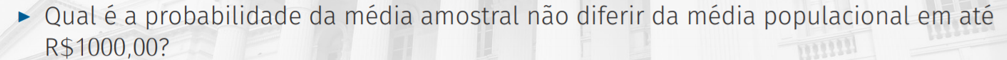

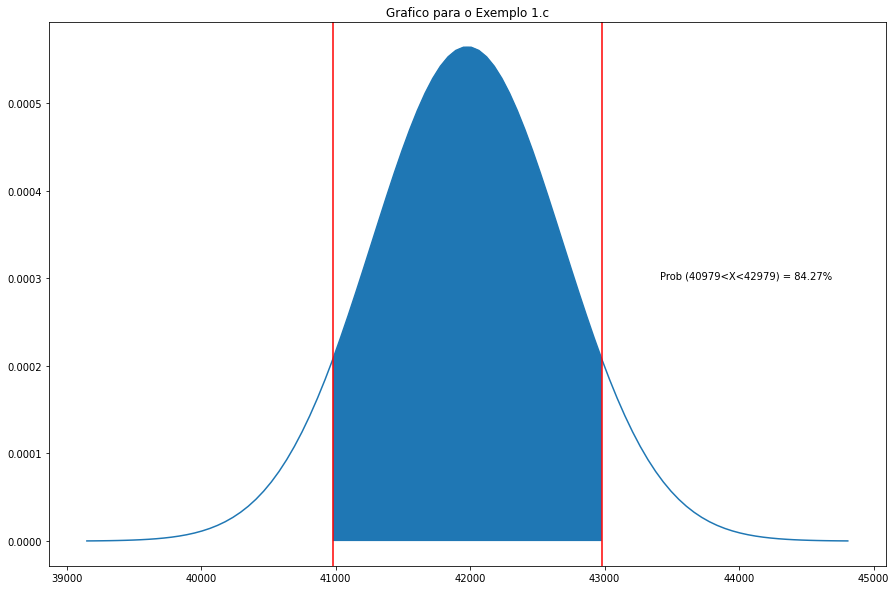

In [38]:
# Probabilidade de X no intervalo  mu - 1000 e mu + 1000

mu = 41979
VARIA = 5000**2/50
sigma = VARIA**0.5

# limites para calculo 
X1 = 41979 - 1000
X2 = 41979 + 1000



probX1 = stats.norm.cdf(X1, mu, sigma)  # probabilide de x < X1
probX2 = stats.norm.cdf(X2, mu, sigma)  # probabilide de x < X2
probDelta = probX2 - probX1             # probabilide de X1 < x < X2  

# pontos para desenhar a curva normal 
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# pontos para compor a area abaixo do grafico 

xa = np.linspace(X1,X2, 100)
ya = stats.norm.pdf(xa, mu, sigma)

# adicionando o ponto final, para fechar o poligono a ser desenhado 
xa = np.append(xa,X2); ya = np.append(ya,0)
xa = np.append(xa,X1); ya = np.append(ya,0)

plt.figure(figsize=(15,10))
plt.title('Grafico para o Exemplo 1.c')

plt.plot(x,y)      # grafico da curva principal 
plt.fill(xa,ya)    # area sob o grafico 

plt.axvline(x=X1, color='r', linestyle='-')
plt.axvline(x=X2, color='r', linestyle='-')

texto = str('Prob (40979<X<42979) = ')+str(round(probDelta*100,3))+str('%')
plt.text(X2*1.01, 0.0003,texto)
plt.show()

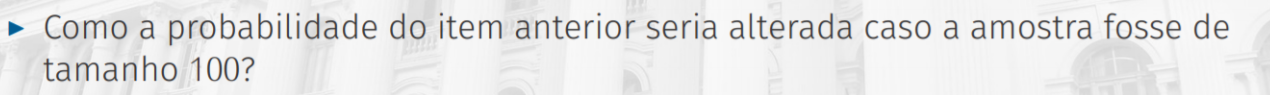

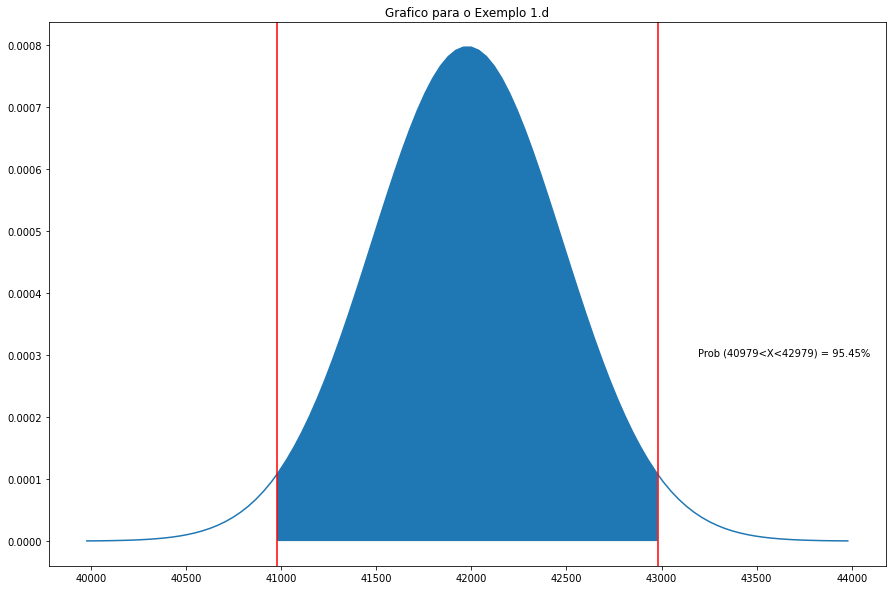

In [39]:
# Probabilidade de X no intervalo  mu - 1000 e mu + 1000

mu = 41979
VARIA = 5000**2/100
sigma = VARIA**0.5

# limites para calculo 
X1 = 41979 - 1000
X2 = 41979 + 1000

# pontos para desenhar a curva normal 
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

probX1 = stats.norm.cdf(X1, mu, sigma)  # probabilide de x < X1
probX2 = stats.norm.cdf(X2, mu, sigma)  # probabilide de x < X2
probDelta = probX2 - probX1             # probabilide de X1 < x < X2  

# pontos para compor a area abaixo do grafico 

xa = np.linspace(X1,X2, 100)
ya = stats.norm.pdf(xa, mu, sigma)

# adicionando o ponto final, para fechar o poligono a ser desenhado 
xa = np.append(xa,X2); ya = np.append(ya,0)
xa = np.append(xa,X1); ya = np.append(ya,0)

plt.figure(figsize=(15,10))
plt.title('Grafico para o Exemplo 1.d')

plt.plot(x,y)      # grafico da curva principal 
plt.fill(xa,ya)    # area sob o grafico 

plt.axvline(x=X1, color='r', linestyle='-')
plt.axvline(x=X2, color='r', linestyle='-')

texto = str('Prob (40979<X<42979) = ')+str(round(probDelta*100,3))+str('%')
plt.text(X2*1.005, 0.0003,texto)
plt.show()

In [ ]:
print("Final da Segunda Parte da Aula")

# Exercícios

Uma máquina enchia pacotes cujos pesos seguiam uma distribuição N(500, 100). Colhendo-se um amostra de $n = 100$ pacotes e pesando-os, pelo que foi dito acima, pergunta-se:


1.    $\bar{X}$ terá uma distribuição normal com $média = 500$ e $variância = ? $ 

2.    Se a máquina estiver regulada, a probabilidade de encontrarmos a média de 100 pacotes diferindo de 500 g de menos de 2 gramas será?

*    $P(498 \leq X \leq 502)$

3.    Se tirarmos uma amostra de tamanho 100 e obtvermos que a média dessa amostra foi igual a 505 gramas, o que podemos inferir sobre a qualidade da máquina?

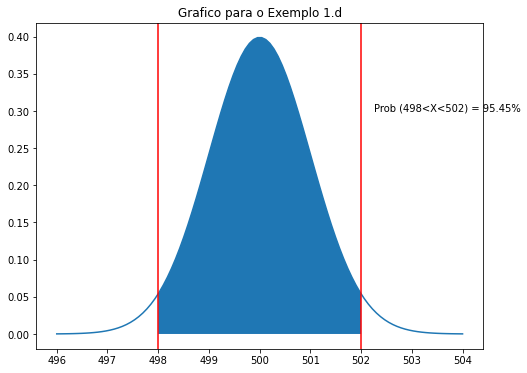

In [44]:
# Probabilidade de X no intervalo  500 - 2 e 500 + 2

mu = 500
VARIA = 100/100
sigma = VARIA**0.5

# limites para calculo 
X1 = 500 - 2
X2 = 500 + 2

# pontos para desenhar a curva normal 
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

probX1 = stats.norm.cdf(X1, mu, sigma)  # probabilide de x < X1
probX2 = stats.norm.cdf(X2, mu, sigma)  # probabilide de x < X2
probDelta = probX2 - probX1             # probabilide de X1 < x < X2  

# pontos para compor a area abaixo do grafico 

xa = np.linspace(X1,X2, 100)
ya = stats.norm.pdf(xa, mu, sigma)

# adicionando o ponto final, para fechar o poligono a ser desenhado 
xa = np.append(xa,X2); ya = np.append(ya,0)
xa = np.append(xa,X1); ya = np.append(ya,0)

plt.figure(figsize=(8,6))
plt.title('Grafico para o Exemplo 1.d')

plt.plot(x,y)      # grafico da curva principal 
plt.fill(xa,ya)    # area sob o grafico 

plt.axvline(x=X1, color='r', linestyle='-')
plt.axvline(x=X2, color='r', linestyle='-')

texto = str('Prob (498<X<502) = ')+str(round(probDelta*100,3))+str('%')
plt.text(X2*1.0005, 0.3,texto)
plt.show()

In [ ]:
print("Final da Aula!")